## BIOS 470/570 Lecture 20

## Last time we covered:
* ### Machine learning for image segmentation:
* - #### Cellpose
  - #### ilastik
## Today we will cover:
* ### Tracking cells through time



In [71]:
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt
from cellpose import plot
from matplotlib import colormaps
from skimage import io

### Use the h5py library to read the file from ilastik, convert the dataset to a numpy array:

In [73]:
f = h5py.File('/Users/aw21/Github/F23course/LecturesF23/data/Example_Tracking-Result.h5', 'r')
dat = f.get('exported_data')
dat_np = np.array(dat)
dat_np.shape

(3, 1, 1024, 1024)

### This has 3 timepoints, 1 channel. The channel is a labeled mask. Tracked objects have their label preserved over time. How many objects are in the dataset?

In [74]:
dat_np.max()

110

### The number 1 is used for unmatched objects, let's see them at two timepoints:

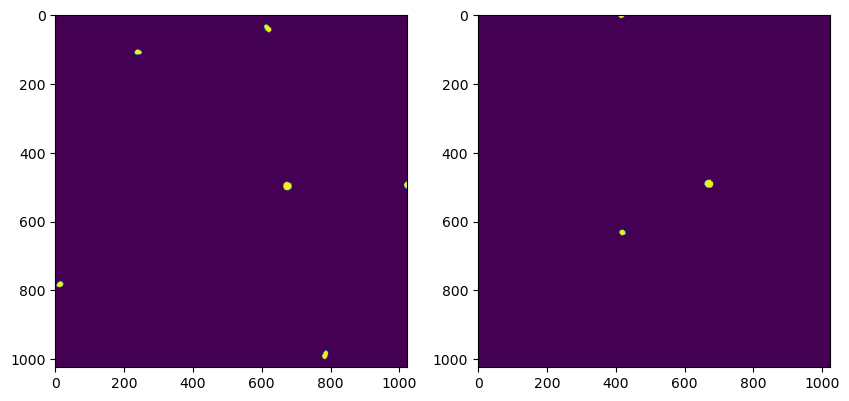

In [75]:
obj1 = dat_np == 1

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1)
ax.imshow(obj1[0,0])

ax = fig.add_subplot(1,2,2)
ax.imshow(obj1[1,0]);

### Object 100 tracked over time:

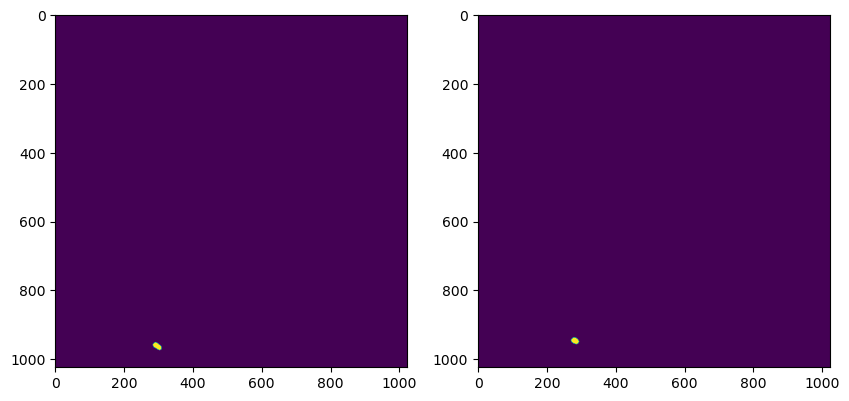

In [76]:
obj1 = dat_np == 100

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1)
ax.imshow(obj1[0,0])

ax = fig.add_subplot(1,2,2)
ax.imshow(obj1[1,0]);

### Object 100 in 3 time points overlaid:

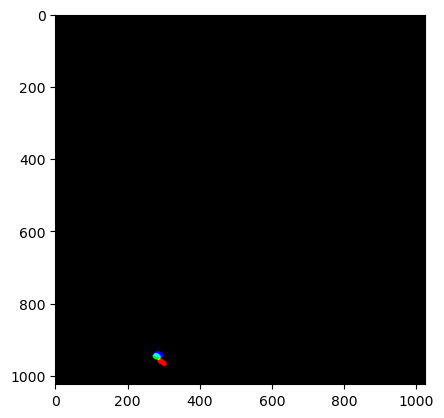

In [77]:
plt.imshow(255*np.moveaxis(obj1[:,0,:,:],[0, 1 ,2],[2, 0 ,1]))

### The unmatched objects over time:

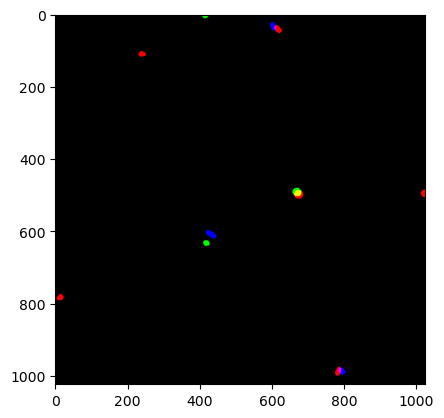

In [78]:
obj1 = dat_np == 1
plt.imshow(255*np.moveaxis(obj1[:,0,:,:],[0, 1 ,2],[2, 0 ,1]))

### Quantify fluorescence in one object over time:

Text(0, 0.5, 'Channel 0 intensity')

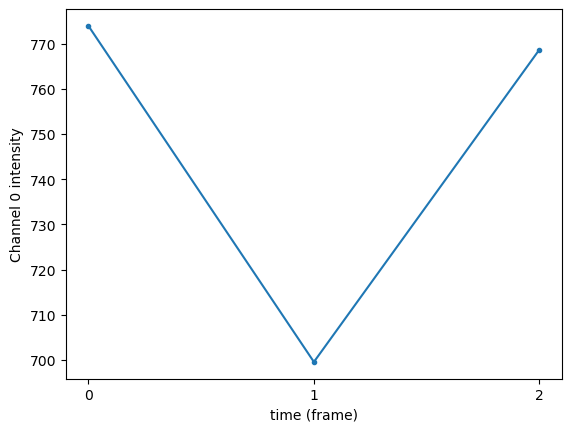

In [79]:
img = io.imread('data/Example.tif')
obj1 = dat_np == 100
mean1 = []
for ii in range(3):
    img1 = img[ii,:,:,0] #time point ii, channel 0
    mask = obj1[ii,0]
    m = img1[mask].mean()
    mean1.append(m)

plt.plot(mean1,'.-')
plt.xticks([0,1,2])
plt.xlabel('time (frame)')
plt.ylabel('Channel 0 intensity')
    
    